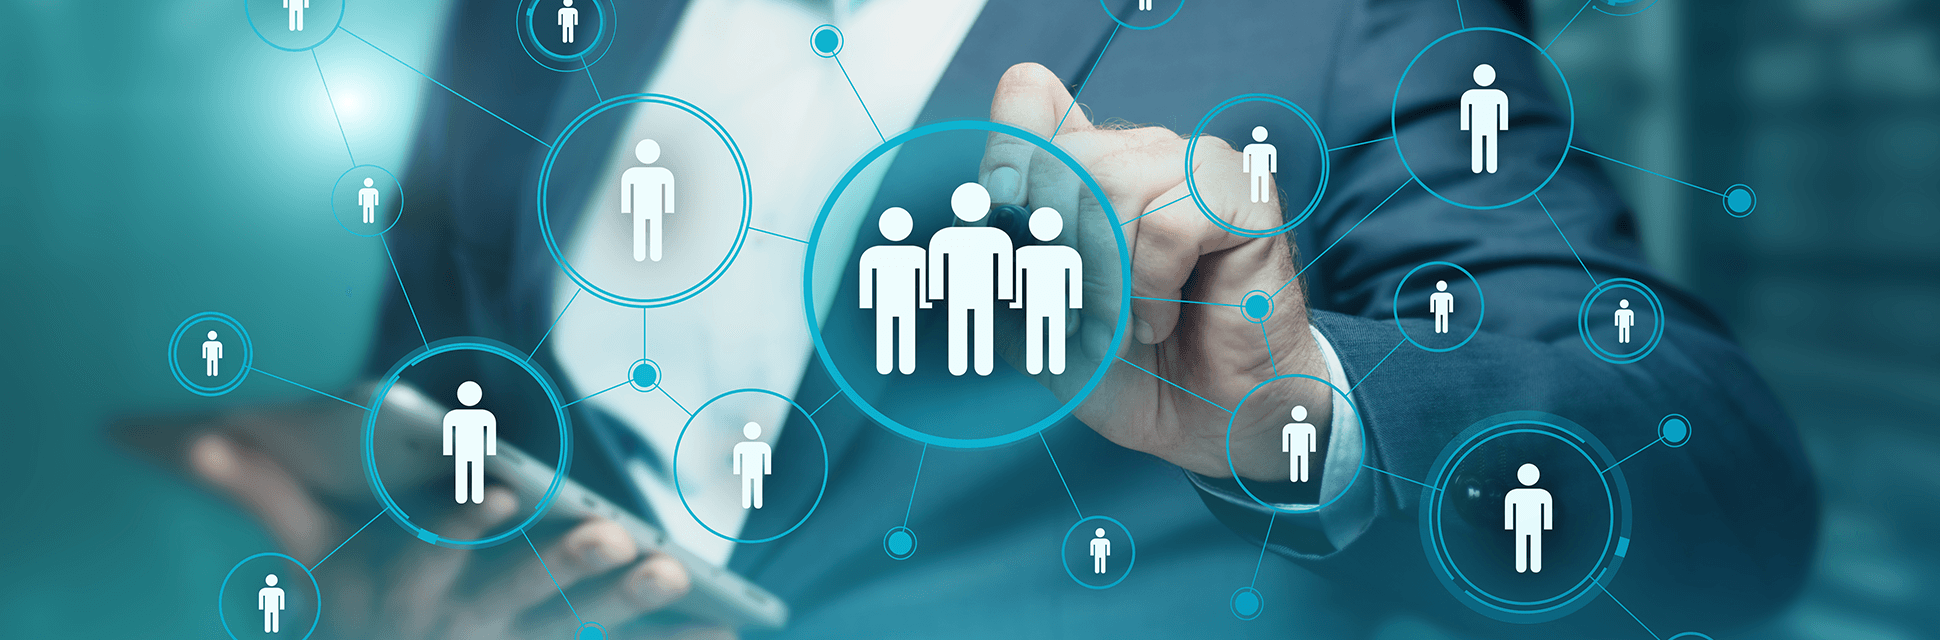

# Recursos Humanos

## Definição do problema

A empresa MGuedes Corporation coletou dados do ano anterior com diversos atributos de funcionários de todos os setores. O objetivo é estudar a relação desses atributos e o impacto na promoção dos funcionários. Esse trabalho de análise pode ser usando mais tarde para construir modelos de Machine Learning para prever se um colaborador será ou não promovido. 

Na sequência estão as perguntas que devem ser respondidas:

- **Pergunta 1** - Qual a Correlação Entre os Atributos Dos Funcionários?
- **Pergunta 2** - Qual o Tempo de Serviço da Maioria Dos Funcionários?
- **Pergunta 3** - Qual Avalição do Ano Anterior Foi Mais Comum?
- **Pergunta 4** - Qual a Distribuição Das Idades Dos Funcionários?
- **Pergunta 5** - Qual o Número De Treinamentos Mais Frequente?
- **Pergunta 6** - Qual a Proporção Dos Funcionários Por Canal De Recrutamento?
- **Pergunta 7** - Qual a Relação Entre a Promoção e a Avalição Do Ano Anterior?

O trabalho a ser feito é limpar e preparar os dados e então construir um Dashboard para apresentar os resultados.

# Carregando e Instalando Pacotes

In [1]:
# Versão da linguagem Python
from platform import python_version
print('Versão da Linguagem Python usada neste notebook:', python_version())

Versão da Linguagem Python usada neste notebook: 3.8.5


In [2]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os Dados

In [3]:
dadosRH = pd.read_csv('dadosRH.csv')

In [4]:
dadosRH.head()

,id_funcionario,departamento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [5]:
dadosRH.shape

(54808, 11)

# Análise Exploratória, Limpeza e Transformação dos Dados

Manipulando os dados e corrigindo eventuais problemas.

In [6]:
dadosRH.isnull().sum()

id_funcionario            0
departamento              0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [7]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departamento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


C:\Users\maure\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educacao', ylabel='count'>

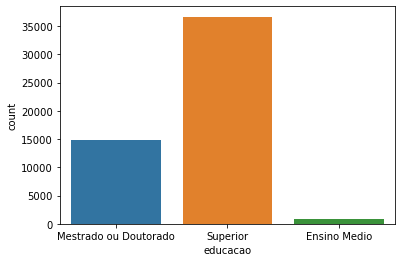

In [8]:
sns.countplot(dadosRH['educacao'])

In [9]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departamento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


C:\Users\maure\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

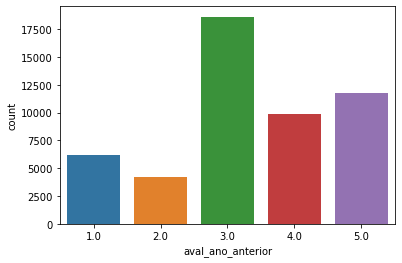

In [10]:
sns.countplot(dadosRH['aval_ano_anterior'])

Aplicando imputação e preenchendo os valores ausentes.

In [11]:
dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace = True)

In [12]:
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace = True)

In [13]:
dadosRH.shape

(54808, 11)

In [14]:
dadosRH.isnull().sum()

id_funcionario         0
departamento           0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [15]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departamento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


In [16]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departamento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


Verificação do balanceamento de classe na variável **promovido**

In [17]:
dadosRH.groupby(['promovido']).count()

,id_funcionario,departamento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


C:\Users\maure\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

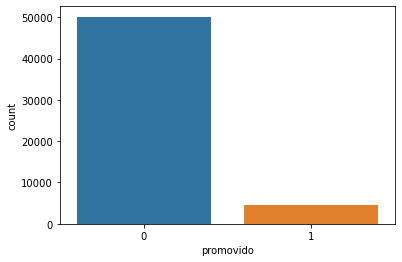

In [18]:
sns.countplot(dadosRH['promovido'])

In [19]:
df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minonitaria = dadosRH[dadosRH.promovido==1]

In [20]:
df_classe_majoritaria.shape

(50140, 11)

In [21]:
df_classe_minonitaria.shape

(4668, 11)

In [22]:
# Upsample da classe minoritaria
from sklearn.utils import resample
df_classe_minonitaria_upsampled = resample(df_classe_minonitaria,
                                            replace = True,
                                            n_samples = 50140,
                                            random_state = 150)

In [23]:
dadosRH_balanceados = pd.concat([df_classe_majoritaria, df_classe_minonitaria_upsampled])

In [24]:
dadosRH_balanceados.promovido.value_counts()

1    50140
0    50140
Name: promovido, dtype: int64

In [25]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departamento         100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


C:\Users\maure\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

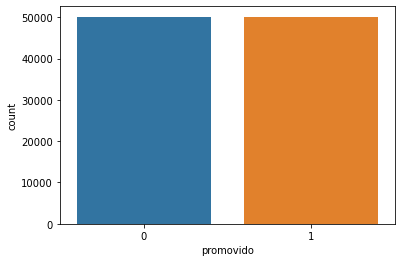

In [26]:
sns.countplot(dadosRH_balanceados['promovido'])

Os dados estão balanceados. Salvando o dataset com os dados manipulados.

In [27]:
dadosRH_balanceados.to_csv("dadosRH_modificado.csv", encoding = 'utf-8', index = False)

**Carregando os dados e seguindo com o trabalho de análise**

In [28]:
# Carregando os dados
dataset = pd.read_csv('dadosRH_modificado.csv')

In [29]:
dataset.head()

,id_funcionario,departamento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [30]:
dataset.shape

(100280, 11)

## Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?

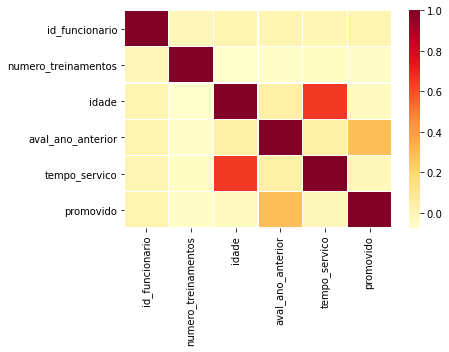

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = dataset.corr()
sns.heatmap(corr, cmap = 'YlOrRd', linewidths = 0.1)
plt.show()

**Respostas**

   - Quanto maior é a idade maior é o tempo de serviço.

## Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?

C:\Users\maure\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


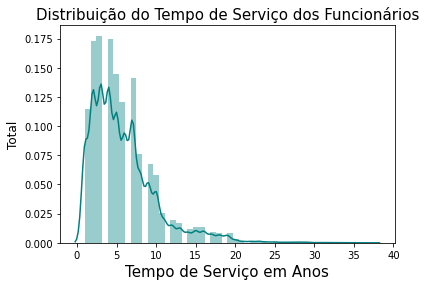

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['tempo_servico'], color = 'teal')
plt.title('Distribuição do Tempo de Serviço dos Funcionários', fontsize = 15)
plt.xlabel('Tempo de Serviço em Anos', fontsize = 15)
plt.ylabel('Total', fontsize = 12)
plt.show()

**Respostas**

   - O tempo em média que um funcionário permanece na empresa são de cinco anos.

## Pergunta  - Qual a Avaliação do Ano Anterior Foi Mais Comum?

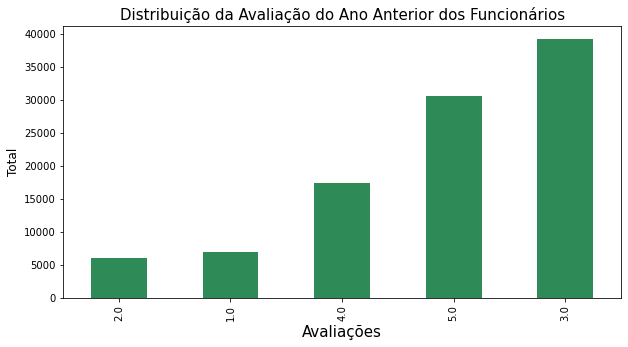

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'seagreen', figsize = (10,5))
plt.title('Distribuição da Avaliação do Ano Anterior dos Funcionários', fontsize = 15)
plt.xlabel('Avaliações', fontsize = 15)
plt.ylabel('Total', fontsize = 12)
plt.show()

**Respostas**

   - A maioria dos funcionários ficaram com a avaliação dentro da média (3,0).
   - Alguns dos funcionários foram avaliados acima da média (4.0 e 5,0).
   - Outros funcionários foram avaliados abaixo da média (1.0 e 2.0).

## Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?

C:\Users\maure\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


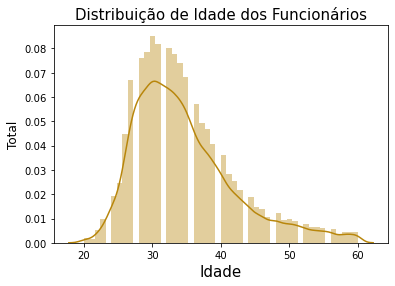

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['idade'], color = 'darkgoldenrod')
plt.title('Distribuição de Idade dos Funcionários', fontsize = 15)
plt.xlabel('Idade', fontsize = 15)
plt.ylabel('Total', fontsize = 12)
plt.show()

**Respostas**

   - A maioria dos funcionários encontram-se com a idade entre 30 e 40.
   - Um número pequeno de funcionários com a idade menor ou igual a 20.
   - Um número pequeno de funcionários com a idade entre 50 e 60.

## Pergunta 5 - Qual o Número de Treinamentos mais Frequentes?

C:\Users\maure\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


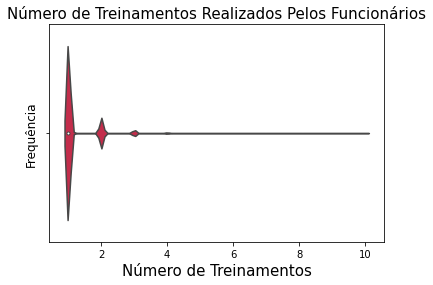

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(dataset['numero_treinamentos'], color = 'crimson')
plt.title('Número de Treinamentos Realizados Pelos Funcionários', fontsize = 15)
plt.xlabel('Número de Treinamentos', fontsize = 15)
plt.ylabel('Frequência', fontsize = 12)
plt.show()

**Respostas**
 
   - A maioria dos funcionários fizeram apenas 1 curso.
   - Um número razoável de funcionários fizeram dois cursos.
   - Poucos funcionários fizeram 3 cursos.
   - Pouquíssimos funcionários fizeram 4 cursos.
   - Acima de 4 cursos nenhum funcionário realizou.

## Pergunta 6 - Qual a Proporção de Funcionários Por Canal de Recrutamento?

In [36]:
dataset['canal_recrutamento'].value_counts()

Outro          55375
Outsourcing    42358
Indicado        2547
Name: canal_recrutamento, dtype: int64

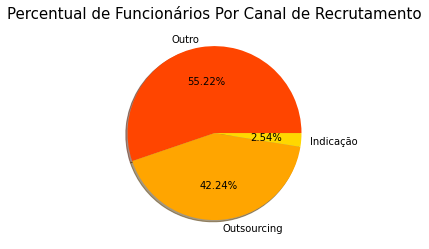

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['canal_recrutamento'].value_counts()
fatias = [55375, 42358, 2547]
labels = 'Outro', 'Outsourcing', 'Indicação'
colors = ['orangered', 'orange', 'gold']
explode = [0, 0, 0]
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Percentual de Funcionários Por Canal de Recrutamento', fontsize = 15)
plt.axis('off')
plt.show()

**Respostas**

   - Um percentual acima de cinquenta porcento (%) pelo canal de recrutamento (outro).
   - Um percentual de um pouco mais de quarenta porcento (%) pelo canal de recrutamento (tercerização).
   - Um percentual bem pequeno pelo canal de recrutamento(indicação).

## Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior? 

In [38]:
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
data

promovido,0,1
aval_ano_anterior,,
1.0,6135,878
2.0,4044,1937
3.0,21048,18223
4.0,9093,8264
5.0,9820,20838


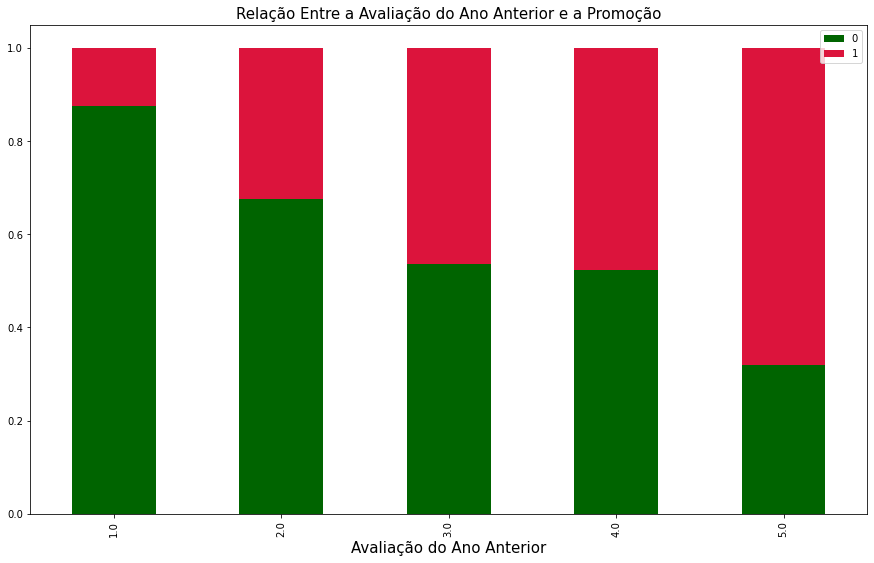

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                  stacked = True,
                                                  figsize = (15,9),
                                                  color = ['darkgreen', 'crimson'])
plt.title('Relação Entre a Avaliação do Ano Anterior e a Promoção', fontsize = 15)
plt.xlabel('Avaliação do Ano Anterior', fontsize = 15)
plt.legend()
plt.show()

**Respostas**

   - Quando a avaliação foi 1.0 muitos não foram promovidos e poucos foram promovidos.
   - Quando a avaliação foi 5.0 muitos foram promovidos e poucos foram promovidos.

# Fim